<a href="https://colab.research.google.com/github/Deltan2002/pytorch/blob/main/Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
# data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) #reshape the tensor

n_samples, n_features =X.shape

In [9]:
#model
input_size, output_size = n_features, 1
model = nn.Linear(input_size, output_size)




In [10]:
#loss and optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


In [11]:
#traingin loop
num_epochs = 100

for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted,y)


  #backward pass
  loss.backward()

  #update weight
  optimizer.step()

  #make grads empty(dont forget this)
  optimizer.zero_grad()

  if (epoch+1)%10 ==0:
    print(f'epoch:{epoch+1}, loss = {loss.item():.4f}')




epoch:10, loss = 4437.7207
epoch:20, loss = 3308.2178
epoch:30, loss = 2491.5029
epoch:40, loss = 1900.2983
epoch:50, loss = 1471.8939
epoch:60, loss = 1161.1626
epoch:70, loss = 935.5825
epoch:80, loss = 771.6860
epoch:90, loss = 652.5164
epoch:100, loss = 565.8082


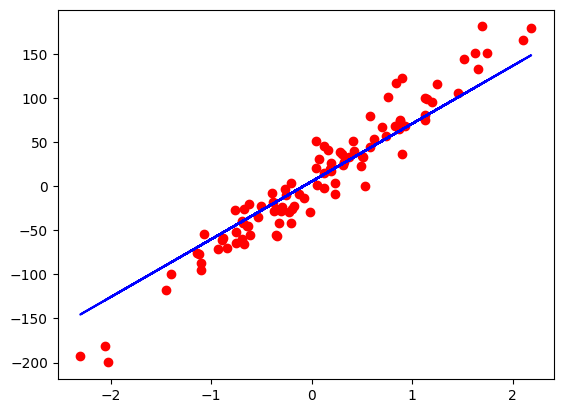

In [12]:
#plot

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()